In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

In [40]:
movie_metadata = pd.read_csv('data_cleaned/movie_cleaned.csv', sep=',')

# Create a new column 'is_english' with 1 if 'TMDB_original_language' is 'en' and 0 otherwise
movie_metadata['is_english'] = np.where(movie_metadata['TMDB_original_language'] == 'en', 1, 0)

In [21]:
# Perform linear regression
X = movie_metadata['is_english']
X = sm.add_constant(X)  # Add an intercept term
y = movie_metadata["log balanced Movie box office revenue"]

model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                                      OLS Regression Results                                     
Dep. Variable:     log balanced Movie box office revenue   R-squared:                       0.038
Model:                                               OLS   Adj. R-squared:                  0.038
Method:                                    Least Squares   F-statistic:                     298.0
Date:                                   Wed, 20 Dec 2023   Prob (F-statistic):           1.62e-65
Time:                                           20:27:31   Log-Likelihood:                -10314.
No. Observations:                                   7563   AIC:                         2.063e+04
Df Residuals:                                       7561   BIC:                         2.065e+04
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                 coe

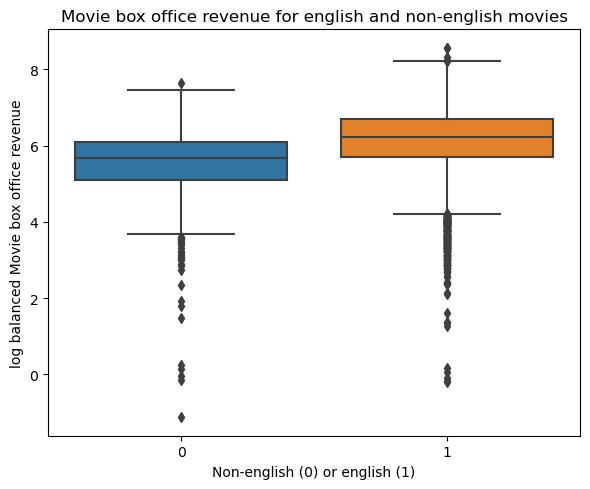

In [39]:
plt.figure(figsize=(6,5))
sns.boxplot(x='is_english', y='log balanced Movie box office revenue', data=movie_metadata)
plt.title('Movie box office revenue for english and non-english movies')
plt.tight_layout()
plt.xlabel('Non-english (0) or english (1)')
plt.savefig('figures/language/boxplots.png', dpi=1000, bbox_inches='tight')
plt.show()